# **Suryakanta Karan (M22AIE207) m22aie207@iitj.ac.in**

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/surya/CV_Assignment/Assignment_1')

Mounted at /content/drive


In [ ]:
# Install required packages
!pip install opencv-python opencv-contrib-python
!pip install matplotlib

##Q1 (a) - Affine Transformation

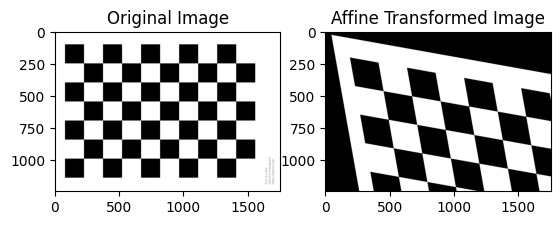

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/surya/CV_Assignment/Assignment_1/pattern.png'
img = cv2.imread(image_path)

# Function to perform affine transformation
def affine_transform(image, scale_x, scale_y, translation_x, translation_y, rotation_angle, shear_angle):
    rows, cols, _ = image.shape

    # Define the transformation matrix (3x3 matrix)
    matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
    matrix[0, 1] = np.tan(np.radians(shear_angle))
    matrix[0, 0] = scale_x
    matrix[1, 1] = scale_y
    matrix[1, 0] = np.tan(np.radians(shear_angle))
    matrix[0, 2] = translation_x
    matrix[1, 2] = translation_y

    # Apply the affine transformation
    result = cv2.warpAffine(image, matrix, (cols, rows))

    return result

# Affine transformation parameters
scale_x, scale_y = 1.5, 1.5
translation_x, translation_y = 50, 30
rotation_angle = 30
shear_angle = 15

# Apply affine transformation
affine_result = affine_transform(img, scale_x, scale_y, translation_x, translation_y, rotation_angle, shear_angle)

# Display the original and affine-transformed images
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(affine_result, cv2.COLOR_BGR2RGB)), plt.title('Affine Transformed Image')
plt.show()


#Q1 (b) - Nonlinear Transformation (Ripple Effect)

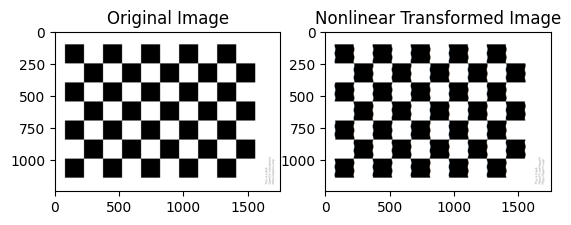

In [10]:
# Function to perform nonlinear transformation (ripple effect)
def nonlinear_transform(image):
    rows, cols, _ = image.shape

    # Create a ripple effect
    x = np.arange(cols)
    y = np.sin(x / 10) * 10  # Adjust the frequency and amplitude for desired effect

    # Apply the ripple effect
    for i in range(rows):
        image[i, :] = np.roll(image[i, :], int(y[i]))

    return image

# Apply nonlinear transformation (ripple effect)
ripple_result = nonlinear_transform(img.copy())

# Display the original and nonlinear-transformed images
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(ripple_result, cv2.COLOR_BGR2RGB)), plt.title('Nonlinear Transformed Image')
plt.show()


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Q.2 A: #Step 2: Harris Corner Detection Implementation

In [ ]:
# Function to perform Harris Corner Detection
def harris_corner_detection(image, window_size, threshold):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Harris corner detection
    corners = cv2.cornerHarris(gray, blockSize=window_size, ksize=3, k=0.04)

    # Threshold the corners
    corners = cv2.dilate(corners, None)
    image[corners > threshold * corners.max()] = [0, 0, 255]  # Mark corners in red

    return image

# Loop through images and vary window size and threshold
# Loop through images and vary window size and threshold
image_folder = "/content/drive/MyDrive/surya/CV_Assignment/Assignment_1/images"
image_names = [f"{i}.jpeg" if f"{i}.jpeg" in os.listdir(image_folder) else f"{i}.jpg" for i in range(1, 11)]

for image_name in image_names:
    image_path = os.path.join(image_folder, image_name)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Unable to load image {image_path}")
        continue

    # Vary window size and threshold
    for window_size in range(2, 7):
        for threshold in [0.01, 0.02, 0.03]:
            result = harris_corner_detection(image.copy(), window_size, threshold)

            # Display the output for each combination
            plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
            plt.title(f"Window Size: {window_size}, Threshold: {threshold}")
            plt.show()



Output hidden; open in https://colab.research.google.com to view.

#Q2. B

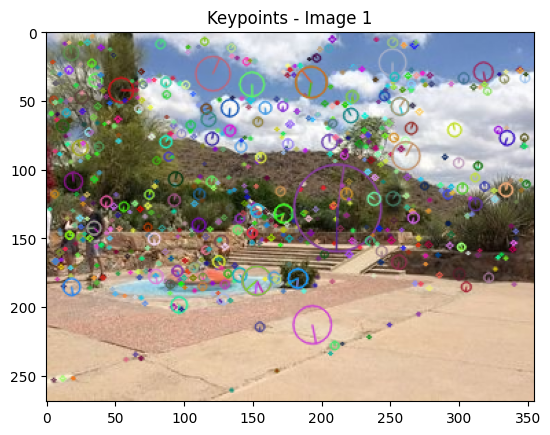

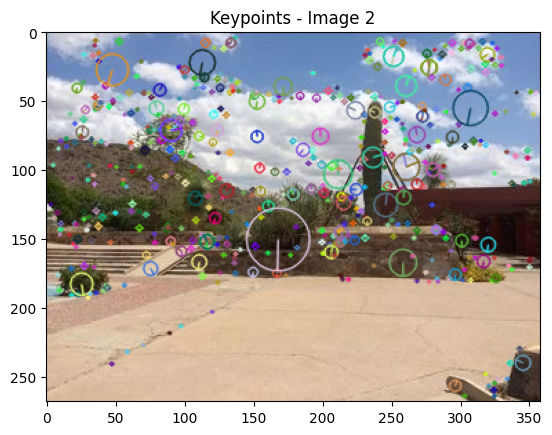

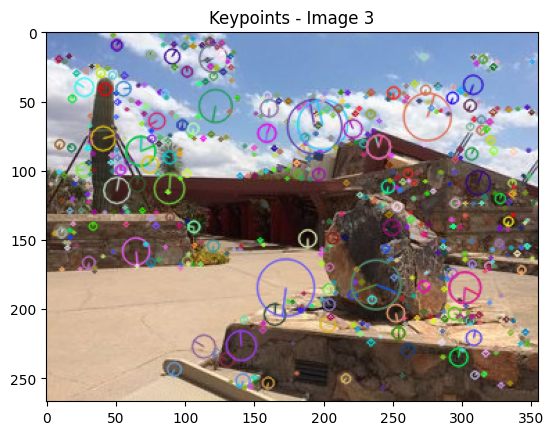

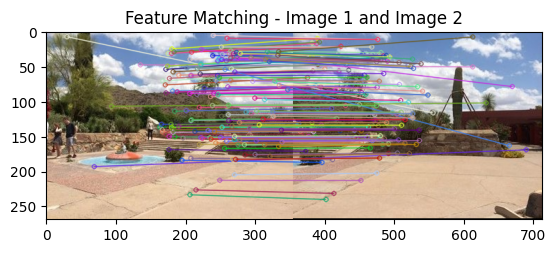

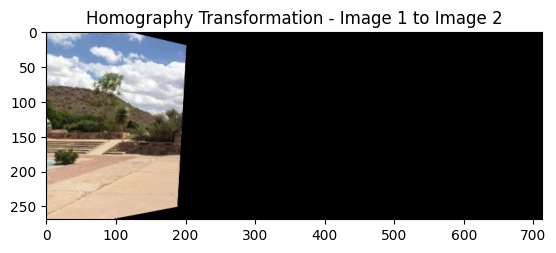

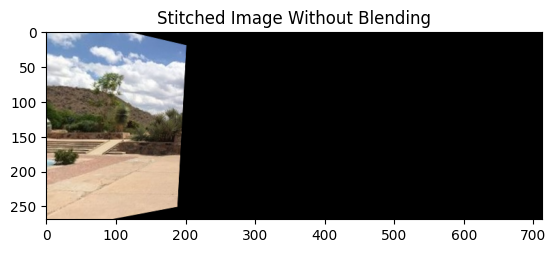

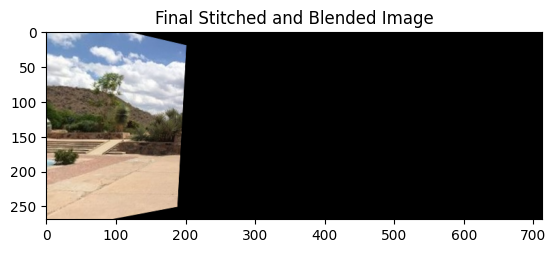

In [ ]:
# Function for image stitching with visualization
def image_stitching_with_visualization(images):
    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors for each image
    keypoints, descriptors = zip(*[sift.detectAndCompute(image, None) for image in images])

    # Visualize keypoints on each image
    for i, image in enumerate(images):
        img_keypoints = cv2.drawKeypoints(image, keypoints[i], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        plt.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
        plt.title(f"Keypoints - Image {i + 1}")
        plt.show()

    # Feature matching
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors[0], descriptors[1], k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Visualize matched keypoints
    img_matches = cv2.drawMatches(images[0], keypoints[0], images[1], keypoints[1], good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title("Feature Matching - Image 1 and Image 2")
    plt.show()

    # Get matched key points
    src_pts = np.float32([keypoints[0][m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints[1][m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find homography matrix using RANSAC
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Visualize homography transformation
    warped_image = cv2.warpPerspective(images[0], H, (images[0].shape[1] + images[1].shape[1], images[0].shape[0]))
    plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
    plt.title("Homography Transformation - Image 1 to Image 2")
    plt.show()

    # Warp the images and combine using blending for smooth transition
    result = cv2.warpPerspective(images[0], H, (warped_image.shape[1], warped_image.shape[0]))

    # Blend the images using cv2.addWeighted
    alpha = 0.5  # Adjust alpha based on the blending effect you desire
    result[:, :images[1].shape[1]] = cv2.addWeighted(result[:, :images[1].shape[1]], 0.5, warped_image[:, :images[1].shape[1]], 0.5, 0)

    # Visualize the stitched image without blending
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Stitched Image Without Blending")
    plt.show()

    # Blend the images using cv2.addWeighted for smooth transition
    result[:, images[1].shape[1]:] = cv2.addWeighted(result[:, images[1].shape[1]:], 0.5, warped_image[:, images[1].shape[1]:], 0.5, 0)

    # Visualize the final stitched and blended image
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Final Stitched and Blended Image")
    plt.show()

# Load images for image stitching
image_paths_stitching = [
    "/content/drive/MyDrive/surya/CV_Assignment/Assignment_1/stitch_image/1.jpg",
    "/content/drive/MyDrive/surya/CV_Assignment/Assignment_1/stitch_image/2.jpg",
    "/content/drive/MyDrive/surya/CV_Assignment/Assignment_1/stitch_image/3.jpg"
]

images_stitching = [cv2.imread(path) for path in image_paths_stitching]

# Perform image stitching with visualization
image_stitching_with_visualization(images_stitching)
